Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [26]:
NAME = "Birna Ósk Valtýsdóttir"
COLLABORATORS = ""

---

## Dimensionality reduction, Tree algorithms and Ensemble methods (20 points)

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
import xgboost as xgb
import time

%matplotlib inline

## Important note
When performing the exercices below, make sure that your random state is always set to 30. This is done to ensure consistency between assignments for the grading process.

#### Exercise 1 (1 point)
Just like in Assignment 4, we will be working with a wine dataset. This time the dataframe will contain wine information like last time but the class we are trying to predict is the type of the wine. The dataset should consists of 13 columns and a class label `wine` Read the csv document [`wine.csv`](./wine.csv) into a `pandas` dataframe. Name the dataframe `wine_X`. Remove the `wine` column (our class label) from the `wine_X` dataframe and place it in a seperate dataframe named `wine_Y`.

In [50]:
# Your code here
wine_X = pd.read_csv('wine.csv')
wine_X.head()
wine_Y = pd.DataFrame(wine_X['Wine'])
wine_X = wine_X.drop(columns="Wine", axis=1)
wine_X

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#### Exercise 2 (1 point)
Split the data from exercise 1 into training and test data. Use 20% of the data as test data.
Train a decision tree model using the training data and measure the accuracy of your model using the test data.

In [51]:
x_train, x_test, y_train, y_test = train_test_split(wine_X, wine_Y, test_size= .2, random_state= 30)

data_tree = tree.DecisionTreeClassifier(random_state=30)
data_tree.fit(x_train, y_train.values.ravel())
data_predictions = data_tree.predict(x_test)
accuracy = accuracy_score(y_test, data_predictions)
print('Accuracy= '+ str(accuracy))


Accuracy= 0.8333333333333334


#### Exercise 3 (1 point)
Use sklearn to plot the decision tree model created in the exercise above. Include feature names so that it's visible in every node what feature the split is performed on. 

[Text(0.5, 0.9285714285714286, 'Proline <= 900.5\ngini = 0.66\nsamples = 142\nvalue = [48, 55, 39]'),
 Text(0.25, 0.7857142857142857, 'Flavanoids <= 0.955\ngini = 0.551\nsamples = 100\nvalue = [7, 54, 39]'),
 Text(0.125, 0.6428571428571429, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]'),
 Text(0.375, 0.6428571428571429, 'OD <= 1.53\ngini = 0.364\nsamples = 69\nvalue = [7, 54, 8]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 7]'),
 Text(0.5, 0.5, 'Alcohol <= 13.04\ngini = 0.228\nsamples = 62\nvalue = [7, 54, 1]'),
 Text(0.375, 0.35714285714285715, 'gini = 0.0\nsamples = 48\nvalue = [0, 48, 0]'),
 Text(0.625, 0.35714285714285715, 'Proline <= 670.0\ngini = 0.561\nsamples = 14\nvalue = [7, 6, 1]'),
 Text(0.5, 0.21428571428571427, 'Proanth <= 2.49\ngini = 0.245\nsamples = 7\nvalue = [0, 6, 1]'),
 Text(0.375, 0.07142857142857142, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(0.625, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.214285

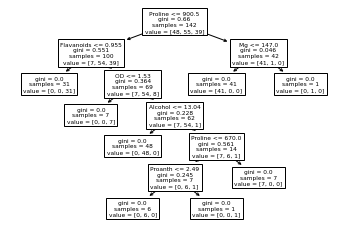

In [52]:
tree.plot_tree(data_tree, feature_names=list(wine_X))

#### Exercise 4 (2 points)
Now we want to find the best value for the max_depth parameter. To do this we are going to perform 5-fold cross validation using our training data and a decision tree classifier. Using GridSearchCV from sklearn.model_selection test all values in the range 1 -> 5 for the parameter `max_depth`. Then measure the accuracy of the model with the best `max_depth` value on the test data and output the accuracy along with the best value for `max_depth`.

In [32]:
param_grid = [{'max_depth': [1,2,3,4,5]}]

# train across 5 folds, that's a total of (27+27)*5=270 rounds of training 
grid_search = GridSearchCV(data_tree, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
search_results = grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print('Best value for max_depth: ', best_params['max_depth'])

final_model = grid_search.best_estimator_

final_predictions = final_model.predict(x_test)

final_accuracy = accuracy_score(y_test, final_predictions)
print('Final accuracy: ', final_accuracy)

Best value for max_depth:  5
Final accuracy:  0.8333333333333334


#### Exercise 5 (2 points)
Explain how the max_depth parameter for decision trees affects model size and how the model size can affect its accuracy.

the max_depth parameter affects the model's training process and there fore its size. If we want to avoid overfitting we would set max_depth to a low value, for example if we set it to 3 the algorithm would stop when reaching level 3 in the tree and wouldn't train any further. Consequently, the accuracy of the model is affected since the training process and how far down the tree model the training will go, is dependent on this parameter. 

#### Exercise 6 (1 point) 
Train a random forest model on the training data and measure your accuracy on the test data.

In [48]:
forest = RandomForestClassifier(random_state=30)
forest.fit(x_train, y_train.values.ravel())

predictions = forest.predict(x_test)
accuracy = accuracy_score(y_test, predictions)

print('Accuracy: ',accuracy)
# confusion_matrix(predictions,y_test)

Accuracy:  0.9722222222222222


#### Exercise 7 (2 points) 

Compare decision trees and random forests. What are the strong points of each of these algorithms when compared to each other. Write your answer in the field below.

The accuracy is higher when using random forests algorithm so that makes them better, also the fact that the ensemble methods of random forests make them more of a go to algorithm. However decision trees are perhaps simpler to understand and interpret. 

#### Exercise 8 (1 point) 

Now we are going to use PCA to reduce the dimensionality of our wine dataset. However there is one preprocessing step that we need perform first, normalizing the data. Use StandardScaler from sklearn.preprocessing to normalize the training and test input data. Make sure that even though you are transforming both the training and test data you should only use the training data when fitting.  Name the normalized data `X_train_normalized` and the test data `X_test_normalized`.

In [34]:
# X_test_normalized = StandardScaler().fit_transform(x_test) 
# X_train_normalized = StandardScaler().fit_transform(x_train)

sc = StandardScaler()
X_train_normalized = sc.fit_transform(x_train)
X_test_normalized = sc.transform(x_test)


#### Exercise 9 (1 point) 
Now its time to reduce the dimensionality of the data using PCA. Using PCA from sklearn.decomposition convert, the normalized training data to as many principal components as needed to explain 96 % of the variance in the data. Afterwards, output the number of components.

In [47]:
pca = PCA(n_components=0.96, random_state=30)
X_train = pca.fit_transform(X_train_normalized)
X_test = pca.transform(X_test_normalized)

explained_variance = pca.explained_variance_ratio_

print('Components: ', pca.n_components_)

Components:  10


#### Exercise 10 (2 points) 

Plot a barplot for the components from exercise 9 where each bar represents the percentage of variance explained by a PCA component (called screeplot in the book). The components should be ordered by how much of the variance they explain from left to right with the components that explain the most variance on the left-hand side.

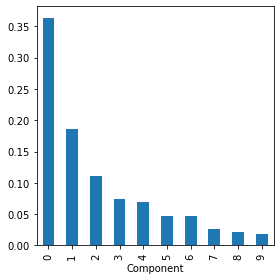

In [36]:
# We inspect the expalained variance ratio.
expl_variance = pd.DataFrame(pca.explained_variance_ratio_)
ax = expl_variance.head(10).plot.bar(legend=False, figsize= (4,4))
ax.set_xlabel('Component')

plt.tight_layout()
plt.show()

#### Exercise 11 (1 point) 
Now its time to train a new random forest model, but this time use the principal components from exercise 9 as input data. Measure the test data accuracy. Note that you have to apply the PCA transformation to your test data before you are able to pass it to the trained classifier.

In [37]:
forest2 = RandomForestClassifier(random_state=30)
forest2.fit(X_train, y_train.values.ravel())

predictions = forest2.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(accuracy)
# confusion_matrix(predictions,y_test)

0.9722222222222222


#### Exercise 12 (1 point)
Explain the benefit of using PCA for dimensionality reduction when training classifiers. Does it make a big difference for random forests ?  

Using PCA for dimensionality reduction naturally reduced the number of variables meaning models can be trained faster without taking too much of a hit to accuracy. This does not matter as much when training random forests and there is not really huge value gained from using PCA before passing the data to a random forest classifier. The reason is that random forests only use a subset of feature when training individual trees, so they are not as affected by the curse of dimensionality

#### Exercise 13 (1 point) 
Now we will be experimenting with XGBoost. Use the original training data to train an XGBoost classifier. Measure the accuracy of the model using the original test data.

In [45]:
import warnings
warnings.filterwarnings("ignore")
# y_trainB = pd.Series([1 if o == 'default' else 0 for o in y_train]) # o = observation

xgboost = xgb.XGBClassifier(random_state=30, disable_default_eval_metric=True)
xgboost.fit(x_train, y_train.values.ravel())

y_tb_pred = xgboost.predict(x_test)

# y_testBoost = pd.Series([1 if o =='default' else 0 for o in y_test])
accuracy = accuracy_score(y_test, y_tb_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.9722222222222222


#### Exercise 14 (1 point) 
Plot the feature importance for the XGBoost classifier created in exercise 13. What features seem to offer the most predictive value?

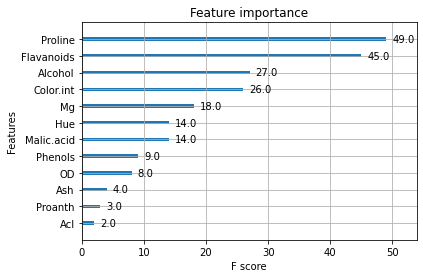

In [44]:
xgb.plot_importance(xgboost)
plt.show()

#### Exercise 15 (2 points) 
Next up is some advanced parameter tuning for XGBoost. Perform 4-fold cross validation on the training data using GridSearchCV to find the best parameter values. The parameters that should be tuned are `max_depth` (values 2-8) and , subsample (values 0.5, 0.6, 0.7, 0.8, 0.9, 1). Output the test accuracy for the model with the best parameters. Output the best parameters as well.

In [43]:
xgboost2 = xgb.XGBClassifier(random_state=30, disable_default_metric=True)
param_gridB = [{'max_depth': [2,3,4,5,6,7,8], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]}]

grid_search2 = GridSearchCV(xgboost2, param_gridB, cv=4)
search_results = grid_search2.fit(X_train, y_train.values.ravel())

final_model = grid_search2.best_estimator_

final_predictions = final_model.predict(X_test)

final_accuracy = accuracy_score(y_test, final_predictions)
print('Final accuracy: ', final_accuracy)
print(final_model.max_depth)
print(final_model.subsample)

[21:35:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1637426272325/work/src/learner.cc:576: 
Parameters: { "disable_default_metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:35:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1637426272325/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:35:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1637426272325/work/src/learner.cc:576: 
Parameters: { "disable_default_metric" } might not be used.

  This could be a false alarm, with some parameter